In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [8]:
# import the dataset
df = pd.read_csv("WorldHappiness_Corruption_2015_2020.csv")

In [3]:
# show the number of missing values in each column
print(df.isnull().sum())

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64


In [33]:
# check the info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB
None


       Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_13740\215405803.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["happiness_score"])


<Axes: xlabel='happiness_score', ylabel='Density'>

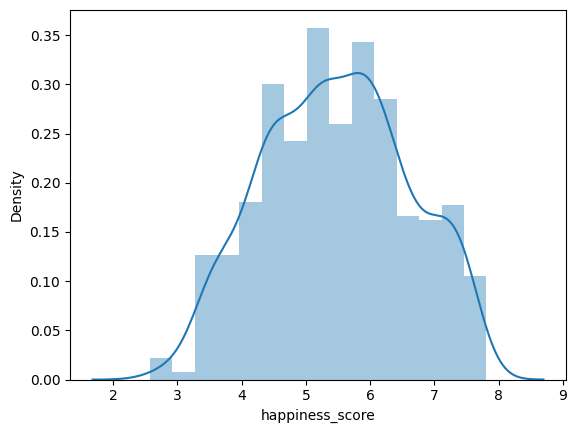

In [34]:
# explore the dataset
print(df.head())

# describe the dataset
print(df.describe())

# show the distribution of the Happiness Score
sns.distplot(df["happiness_score"])

<Axes: xlabel='Year', ylabel='happiness_score'>

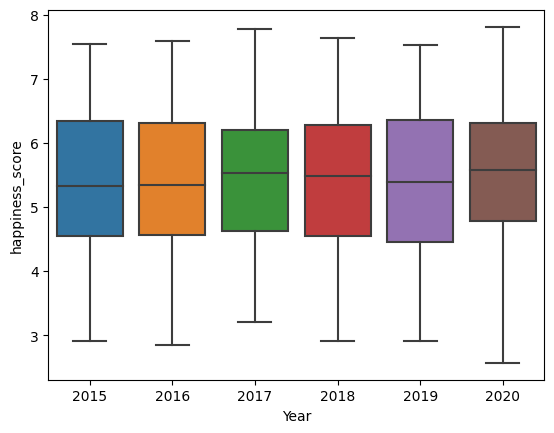

In [9]:
# show the distribution of the Happiness Score by year
sns.boxplot(x="Year", y="happiness_score", data=df)

<Axes: xlabel='Year', ylabel='gdp_per_capita'>

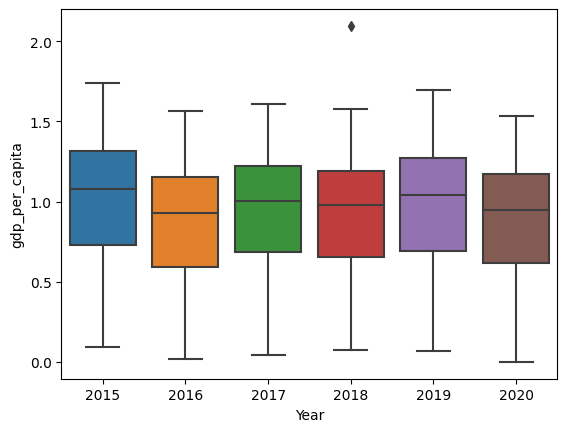

In [4]:
# distribution of the gp_per_capita by year
sns.boxplot(x="Year", y="gdp_per_capita", data=df)

<Axes: xlabel='Country', ylabel='happiness_score'>

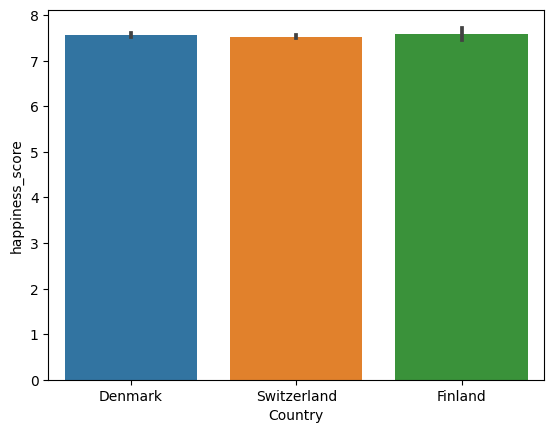

In [5]:
# show the Happiness Score in 2020 for the top 3 countries
top_3_countries = ["Finland", "Denmark", "Switzerland"]
df_top_3_countries = df[df["Country"].isin(top_3_countries)]
sns.barplot(x="Country", y="happiness_score", data=df_top_3_countries)

<Axes: xlabel='happiness_score', ylabel='cpi_score'>

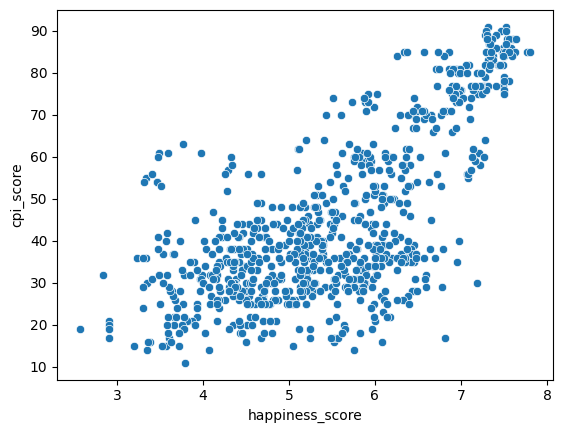

In [5]:
# happiness score in comparison to the cpi score
sns.scatterplot(x="happiness_score", y="cpi_score", data=df)

<Axes: xlabel='cpi_score', ylabel='Count'>

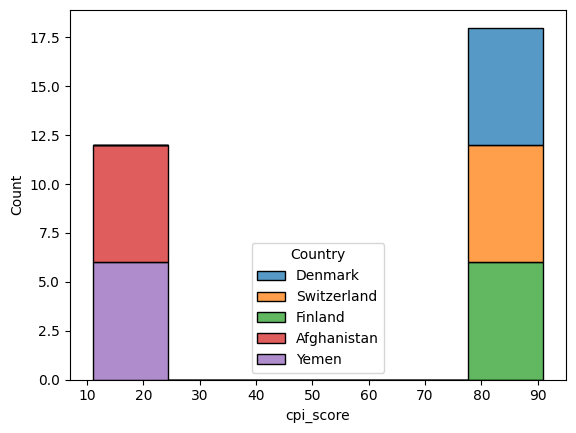

In [14]:
# cpi score for the top 3 countries and the bottom 3 countries in the years from 2015 to 2020 in a histogram
top_bottom_3_countries = ["Finland", "Denmark", "Switzerland", "Afghanistan", "Syria", "Yemen"]
df_top_bottom_3_countries = df[df["Country"].isin(top_bottom_3_countries)]
sns.histplot(x="cpi_score", hue="Country", data=df_top_bottom_3_countries, multiple="stack")

<Axes: xlabel='Country', ylabel='happiness_score'>

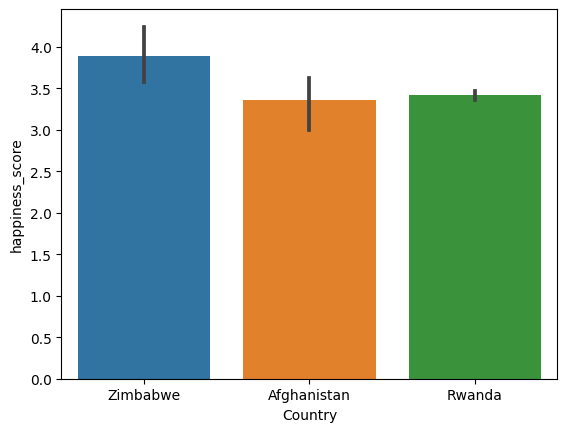

In [6]:
# show the Happiness Score in 2020 for the bottom 3 countries
bottom_3_countries = ["Afghanistan", "Zimbabwe", "Rwanda"]
df_bottom_3_countries = df[df["Country"].isin(bottom_3_countries)]
sns.barplot(x="Country", y="happiness_score", data=df_bottom_3_countries)

<Axes: xlabel='Country', ylabel='happiness_score'>

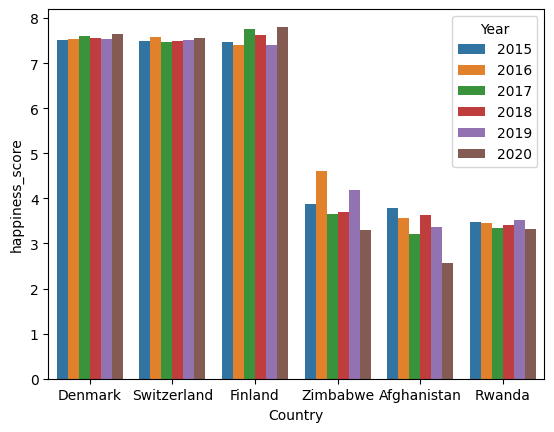

In [20]:
# compare the Happiness Score in 2020 for the top 3 and bottom 3 countries
df_top_bottom_3_countries = pd.concat([df_top_3_countries, df_bottom_3_countries])
sns.barplot(x="Country", y="happiness_score", hue="Year", data=df_top_bottom_3_countries)

count    792.000000
mean       0.125720
std        0.109032
min        0.000000
25%        0.052862
50%        0.089000
75%        0.154250
max        0.551910
Name: government_trust, dtype: float64


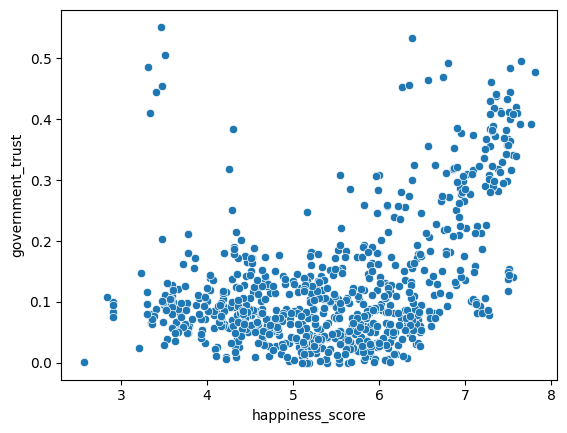

In [23]:
# Investigate the relationship between happiness and government_trust levels across different countries
sns.scatterplot(x="happiness_score", y="government_trust", data=df)

# show the range of government_trust levels
print(df["government_trust"].describe())

## Quantitative Analysis

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_7380\806512552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()



 most correlated couple features 

happiness_score    happiness_score    1.000000
gdp_per_capita     happiness_score    0.793267
                   health             0.774980
happiness_score    health             0.753534
gdp_per_capita     cpi_score          0.704483
cpi_score          happiness_score    0.693001
                   health             0.644478
government_trust   cpi_score          0.620089
dystopia_residual  family             0.600243
freedom            happiness_score    0.544284
dtype: float64

 -----------least correlated features with happiness_score 

Year                 0.023495
family               0.154946
generosity           0.155419
dystopia_residual    0.174161
social_support       0.192633
government_trust     0.455477
freedom              0.544284
cpi_score            0.693001
health               0.753534
gdp_per_capita       0.793267
Name: happiness_score, dtype: float64


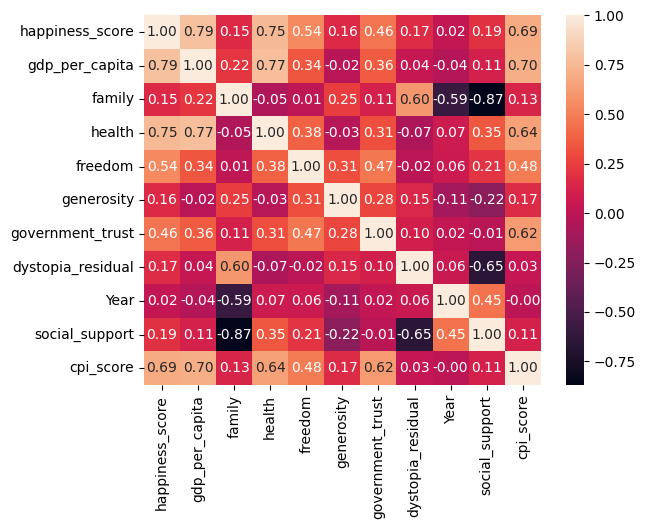

In [21]:
# correlation matrix of the dataset (only 2 decimal places)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

# the most correlated couple features (only 2 decimal places)
print("\n most correlated couple features \n")
print(corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:10])

# the least correlated couple features (only 2 decimal places)
# print("\n least correlated couple features \n")
# print(corr_matrix.unstack().sort_values(ascending=True).drop_duplicates()[:10])

# least correlated features with happiness_score
print("\n -----------least correlated features with happiness_score \n")
print(corr_matrix["happiness_score"].sort_values(ascending=True)[:10])

<Axes: xlabel='happiness_score', ylabel='gdp_per_capita'>

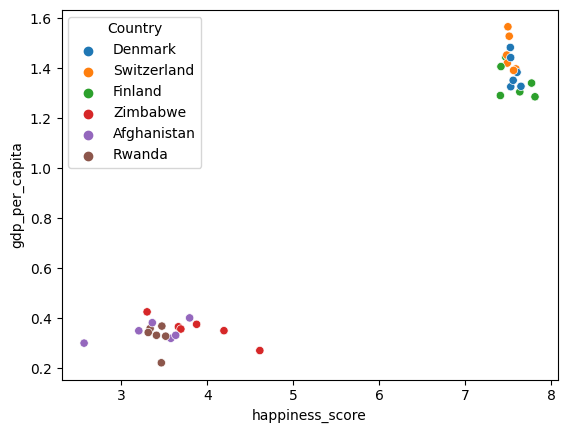

In [14]:
# top bottom 3 countries
df_top_bottom_3_countries = pd.concat([df_top_3_countries, df_bottom_3_countries])

# show the relationship between happiness and gpd_per_capita of the top 3 countries and bottom 3 countries
sns.scatterplot(x="happiness_score", y="gdp_per_capita", hue="Country", data=df_top_bottom_3_countries)



<Axes: xlabel='happiness_score', ylabel='health'>

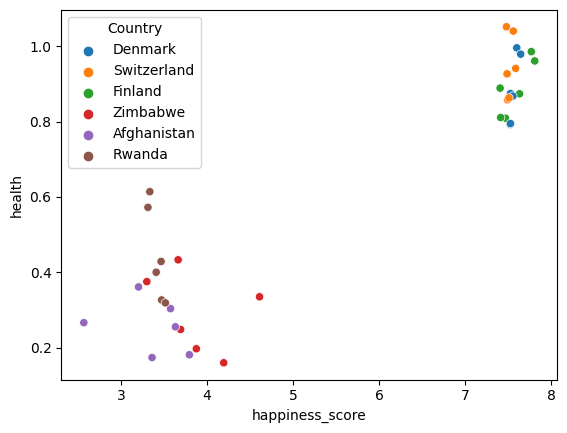

In [16]:
# happiness in comparison to the healt of the top 3 countries and bottom 3 countries
sns.scatterplot(x="happiness_score", y="health", hue="Country", data=df_top_bottom_3_countries)

<Axes: xlabel='happiness_score', ylabel='government_trust'>

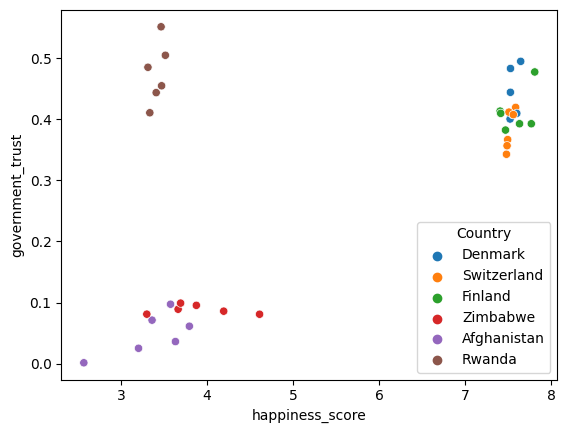

In [21]:
# happiness in comparison to the government_trust of the top 3 countries (in dark green, green and light green) and bottom 3 countries (in dark red, red and light red)
sns.scatterplot(x="happiness_score", y="government_trust", hue="Country", data=df_top_bottom_3_countries)


<Axes: xlabel='happiness_classification', ylabel='count'>

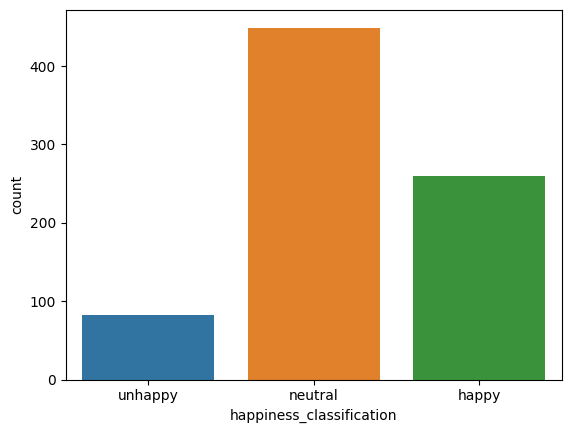

In [25]:
# plot classification of the happiness score (0-4: unhappy, 4-6: neutral, 6-10: happy)
df["happiness_classification"] = pd.cut(df["happiness_score"], bins=[0, 4, 6, 10], labels=["unhappy", "neutral", "happy"])
sns.countplot(x="happiness_classification", data=df)



<Axes: xlabel='Year', ylabel='gdp_per_capita'>

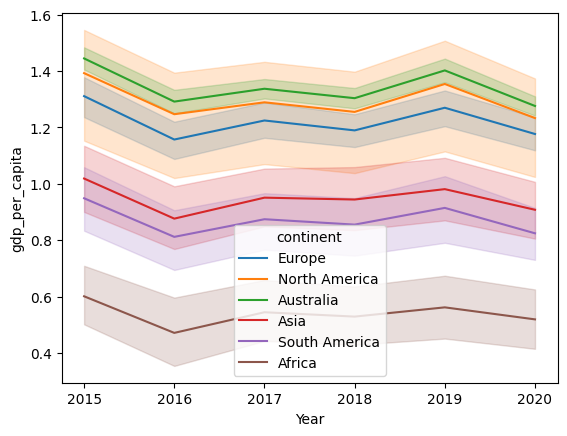

In [53]:
# gdp per capita by year of each continent, x axis: year, y axis: gdp per capita
sns.lineplot(data=df,
             x="Year", 
             y="gdp_per_capita", 
             hue="continent")

<Axes: xlabel='Year', ylabel='happiness_score'>

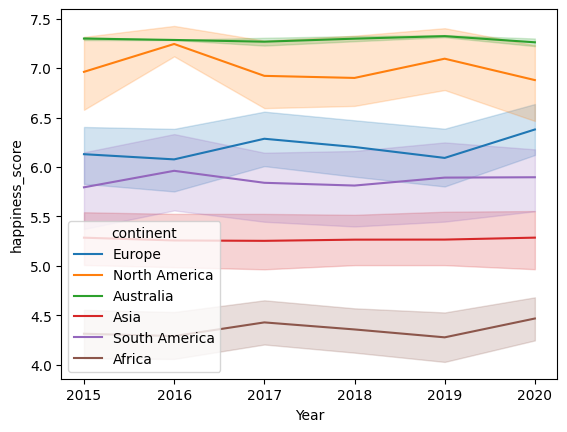

In [46]:
# happiness score by year of each continent, x axis: year, y axis: happiness score
sns.lineplot(data=df,
             x="Year", 
             y="happiness_score", 
             hue="continent")

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_7380\4067957741.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_years_europe.groupby('Year').mean()[['gdp_per_capita', 'happiness_score']]


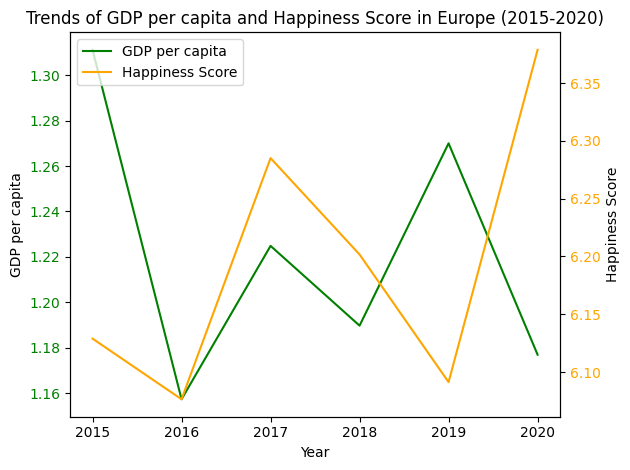

In [69]:
df_europe = df[df['continent'] == 'Europe']  # Assuming 'Europe' is the continent value for European countries

df_years_europe = df_europe[df_europe['Year'].between(2015, 2020)]  # Filtered data for Europe and years 2015-2020

df_grouped = df_years_europe.groupby('Year').mean()[['gdp_per_capita', 'happiness_score']]

fig, ax1 = plt.subplots()

# Plotting GDP per capita on the left y-axis
ax1.plot(df_grouped.index, df_grouped['gdp_per_capita'], label='GDP per capita', linestyle='-', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita')
ax1.tick_params(axis='y', labelcolor='green')

# Creating a secondary y-axis for happiness score
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['happiness_score'], label='Happiness Score', linestyle='-', color='orange')
ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Trends of GDP per capita and Happiness Score in Europe (2015-2020)')
plt.tight_layout()  # Ensures labels and titles are not cut off

# Displaying a single legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_7380\209175203.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_years_asia.groupby('Year').mean()[['gdp_per_capita', 'happiness_score']]


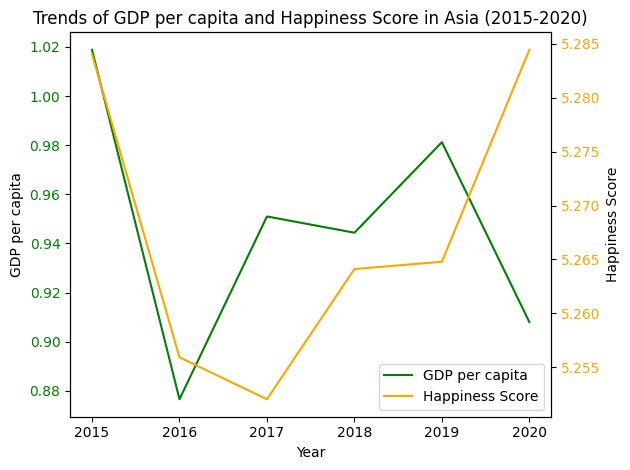

In [70]:
df_asia = df[df['continent'] == 'Asia']  # Assuming 'Asia' is the continent value for Asian countries

df_years_asia = df_asia[df_asia['Year'].between(2015, 2020)]  # Filtered data for Asia and years 2015-2020

df_grouped = df_years_asia.groupby('Year').mean()[['gdp_per_capita', 'happiness_score']]

fig, ax1 = plt.subplots()

# Plotting GDP per capita on the left y-axis
ax1.plot(df_grouped.index, df_grouped['gdp_per_capita'], label='GDP per capita', linestyle='-', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita')
ax1.tick_params(axis='y', labelcolor='green')

# Creating a secondary y-axis for happiness score
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['happiness_score'], label='Happiness Score', linestyle='-', color='orange')
ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Trends of GDP per capita and Happiness Score in Asia (2015-2020)')
plt.tight_layout()  # Ensures labels and titles are not cut off

# Displaying a single legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_12320\953965871.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



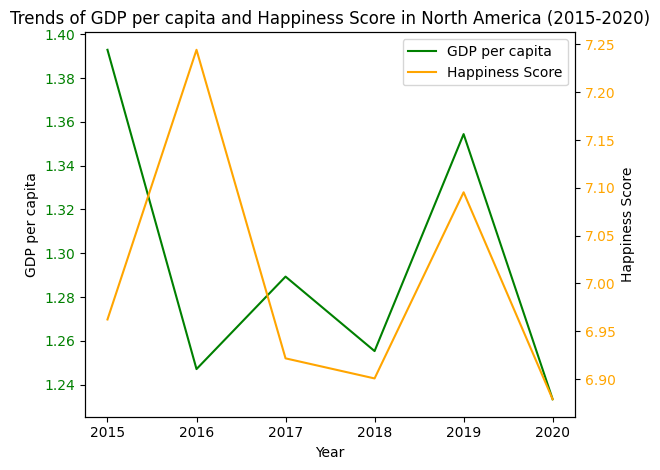

In [23]:
df_NorthAmerica = df[df['continent'] == 'North America']

df_years_NorthAmerica = df_NorthAmerica[df_NorthAmerica['Year'].between(2015, 2020)]  # Filtered data for North American and years 2015-2020

df_grouped = df_years_NorthAmerica.groupby('Year').mean()[['gdp_per_capita', 'happiness_score']]

fig, ax1 = plt.subplots()

# Plotting GDP per capita on the left y-axis
ax1.plot(df_grouped.index, df_grouped['gdp_per_capita'], label='GDP per capita', linestyle='-', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita')
ax1.tick_params(axis='y', labelcolor='green')

# Creating a secondary y-axis for happiness score
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['happiness_score'], label='Happiness Score', linestyle='-', color='orange')
ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Trends of GDP per capita and Happiness Score in North America (2015-2020)')
plt.tight_layout()  # Ensures labels and titles are not cut off

# Displaying a single legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_12320\2747762081.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



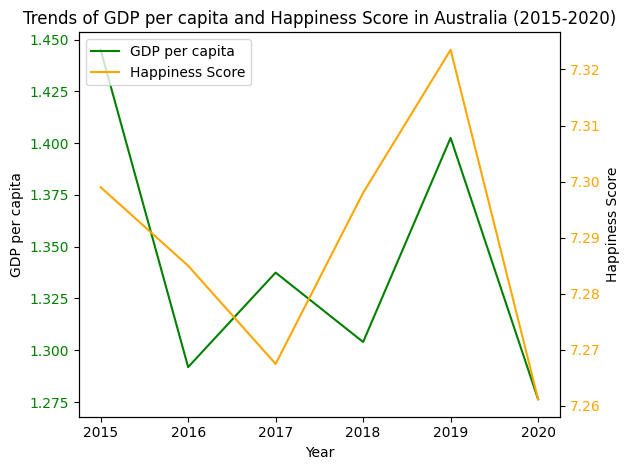

In [24]:
df_Australia = df[df['continent'] == 'Australia']  # Assuming 'Australia' is the continent value for Australian countries

df_years_Australia = df_Australia[df_Australia['Year'].between(2015, 2020)]  # Filtered data for Australia and years 2015-2020

df_grouped = df_years_Australia.groupby('Year').mean()[['gdp_per_capita', 'happiness_score']]

fig, ax1 = plt.subplots()

# Plotting GDP per capita on the left y-axis
ax1.plot(df_grouped.index, df_grouped['gdp_per_capita'], label='GDP per capita', linestyle='-', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita')
ax1.tick_params(axis='y', labelcolor='green')

# Creating a secondary y-axis for happiness score
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['happiness_score'], label='Happiness Score', linestyle='-', color='orange')
ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Trends of GDP per capita and Happiness Score in Australia (2015-2020)')
plt.tight_layout()  # Ensures labels and titles are not cut off

# Displaying a single legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_12320\2935779867.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



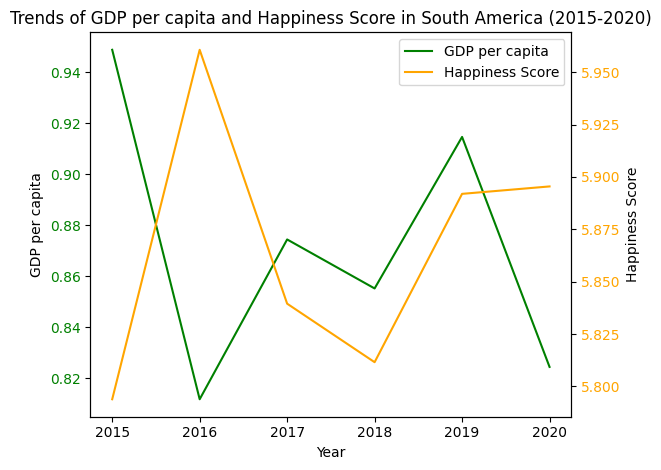

In [25]:
df_SouthAmerica = df[df['continent'] == 'South America']  # Assuming 'South America' is the continent value for South American countries

df_years_SouthAmerica = df_SouthAmerica[df_SouthAmerica['Year'].between(2015, 2020)]  # Filtered data for South America and years 2015-2020

df_grouped = df_years_SouthAmerica.groupby('Year').mean()[['gdp_per_capita', 'happiness_score']]

fig, ax1 = plt.subplots()

# Plotting GDP per capita on the left y-axis
ax1.plot(df_grouped.index, df_grouped['gdp_per_capita'], label='GDP per capita', linestyle='-', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita')
ax1.tick_params(axis='y', labelcolor='green')

# Creating a secondary y-axis for happiness score
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['happiness_score'], label='Happiness Score', linestyle='-', color='orange')
ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Trends of GDP per capita and Happiness Score in South America (2015-2020)')
plt.tight_layout()  # Ensures labels and titles are not cut off

# Displaying a single legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()